In [3]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns

In [4]:
CSVFILE_DIR = "/media/dhruv2601/lisp/Research/Battery_Optimization/APKcollector/Results/ThunderOutput.csv"

In [6]:
df = pd.read_csv(CSVFILE_DIR, sep='\t', encoding='utf-8-sig')
regex = '([a-zA-Z0-9_-])'
# df = df.rename(columns=dict((col, ''.join(re.findall(regex, col))) for col in df.columns))
df

,Unnamed: 0,serial,category,package,target_sdk,min_sdk,totalFS,totalBS,numSS,numSF,numSFS,totalService
0,0,0,ANDROID_WEAR,ch.publisheria.bring,27,16,0,18,8,0,2,18
1,1,1,ANDROID_WEAR,com.aa.android,26,21,5,25,19,5,2,30
2,2,2,ANDROID_WEAR,com.acmeaom.android.myradar,26,15,1,14,14,1,2,15
3,3,4,ANDROID_WEAR,com.adi.remote.phone,25,16,1,9,6,1,0,10
4,4,5,ANDROID_WEAR,com.aircanada,24,19,1,12,14,1,2,13
5,5,6,ANDROID_WEAR,com.amdroidalarmclock.amdroid,27,14,23,26,5,23,1,49
6,6,7,ANDROID_WEAR,com.android2.calculator3,25,14,1,1,2,1,0,2
7,7,9,ANDROID_WEAR,com.balysv.loop,27,16,0,23,19,0,2,23
8,8,10,ANDROID_WEAR,com.baseapp.eyeem,26,15,2,12,6,2,2,14
9,9,11,ANDROID_WEAR,com.bitdefender.security,25,15,2,25,26,2,0,27


In [26]:
# for i in range(1, 341):
#     if(int(df['serial'].loc[341-i])-int(df['serial'].loc[341-i-1])==1):
#         df['numSS'].loc[341-i] = int(df['numSS'].loc[341-i]) - int(df['numSS'].loc[341-i-1])
#         df['numSF'].loc[341-i] = int(df['numSF'].loc[341-i]) - int(df['numSF'].loc[341-i-1])
#         df['numSFS'].loc[341-i] = int(df['numSFS'].loc[341-i]) - int(df['numSFS'].loc[341-i-1])
#         df['totalFS'].loc[341-i] = int(df['numSF'].loc[341-i])
#         df['totalBS'].loc[341-i] = int(df['totalService'].loc[341-i]) - int(df['totalFS'].loc[341-i])

In [40]:
df['totalFS'] = df['totalFS'].astype('str')
df['totalFS'] = df['totalFS'].str.replace('-','')

df['totalBS'] = df['totalBS'].astype('str')
df['totalBS'] = df['totalBS'].str.replace('-','')

df['totalFS'] = df['totalFS'].astype('int')
df['totalBS'] = df['totalBS'].astype('int')

In [28]:
df.to_csv(CSVFILE_DIR, sep='\t', encoding='utf-8')

In [37]:
fs = 0
bs = 0
for i in range(0, df.shape[0]-1):
    fs+=int(df['totalFS'].loc[i])
    bs+=int(df['totalBS'].loc[i])
print(fs)
print(bs)

305
2579


In [118]:
dfFS = pd.DataFrame(dtype='string', columns=['avgFS'])
dfFsMin = pd.DataFrame(dtype='string', columns=['avgFS'])

In [119]:
# -- for targetSDK vs foreground service

target = []
FS = []

for i in range(29):
    target.append(0)
    FS.append(0)

for i, row in df.iterrows():
    FS[row['target_sdk']] = FS[row['target_sdk']]+row['totalFS']
#     service[row[' min_sdk ']] = service[row[' min_sdk ']]+row[' #Services ']
# for i in range(0, len(FS)):
#     print(FS[i])


In [120]:
# -- for targetSDK vs foreground service

FSreal = []
ind=0
tempTotal = 0

for i in range(0, len(FS)):
    tempTotal= tempTotal + FS[i]

for i in range(0, tempTotal):
    FSreal.append(0)

for i in range(0, len(FS)):
    x = FS[i]
    for j in range(0, x):
        FSreal[ind] = i-1
        ind = ind+1

        
for i in range(0, len(FSreal)):
#     dfFS['targetSDK'].loc[i] = i 
#     dfFS['avgFS'].loc[i] = 0
    dfFS.loc[i] = [FSreal[i]]
# dfFS

In [96]:
# for i in range(0, df.shape[0]-1):
#     dfFS['avgFS'].loc[df['target_sdk']] = int(dfFS['avgFS'].loc[df['target_sdk']]) + int(df['totalFS'].loc[i])
# dfFS

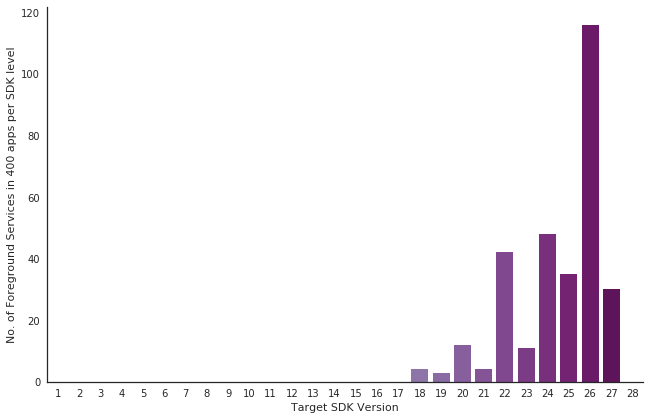

In [121]:
sns.set(style="white")

sdkLevel = np.arange(1,29)

g = sns.factorplot(x="avgFS", data = dfFS, kind = "count", palette="BuPu", size=6, aspect=1.5, order=sdkLevel)
g.set(xlabel='Target SDK Version', ylabel='No. of Foreground Services in 400 apps per SDK level')
g.set_xticklabels(step=1)
# g.set_yticklabels(step=1)

In [116]:
# -- for minSDK vs foreground service

target = []
FSmin = []

for i in range(29):
    target.append(0)
    FSmin.append(0)

for i, row in df.iterrows():
    FSmin[row['min_sdk']] = FSmin[row['min_sdk']]+row['totalFS']
#     service[row[' min_sdk ']] = service[row[' min_sdk ']]+row[' #Services ']
# for i in range(0, len(FS)):
#     print(FS[i])


In [126]:
# -- for minSDK vs foreground service

FSrealMin = []
ind=0
tempTotal = 0

for i in range(0, len(FSmin)):
    tempTotal= tempTotal + FSmin[i]

for i in range(0, tempTotal):
    FSrealMin.append(0)

for i in range(0, len(FSmin)):
    x = FSmin[i]
    for j in range(0, x):
        FSrealMin[ind] = i-1
        ind = ind+1

        
for i in range(0, len(FSrealMin)):
#     dfFS['targetSDK'].loc[i] = i 
#     dfFS['avgFS'].loc[i] = 0
    dfFsMin.loc[i] = [FSrealMin[i]]
# dfFsMin

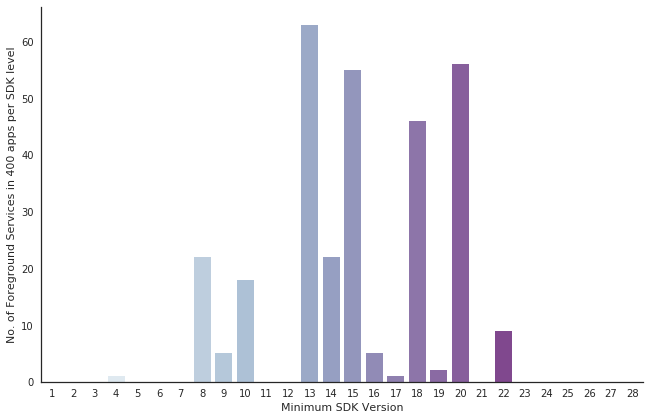

In [125]:
sns.set(style="white")

sdkLevel = np.arange(1,29)

g = sns.factorplot(x="avgFS", data = dfFsMin, kind = "count", palette="BuPu", size=6, aspect=1.5, order=sdkLevel)
g.set(xlabel='Minimum SDK Version', ylabel='No. of Foreground Services in 400 apps per SDK level')
g.set_xticklabels(step=1)
# g.set_yticklabels(step=1)

In [132]:
dfBS = pd.DataFrame(dtype='string', columns=['avgBS'])
dfBsMin = pd.DataFrame(dtype='string', columns=['avgBS'])

In [130]:
# -- for targetSDK vs background service

target = []
BS = []

for i in range(29):
    target.append(0)
    BS.append(0)

for i, row in df.iterrows():
    BS[row['target_sdk']] = BS[row['target_sdk']]+row['totalBS']
#     service[row[' min_sdk ']] = service[row[' min_sdk ']]+row[' #Services ']
# for i in range(0, len(FS)):
#     print(FS[i])


In [133]:
# -- for targetSDK vs background service

BSreal = []
ind=0
tempTotal = 0

for i in range(0, len(BS)):
    tempTotal= tempTotal + BS[i]

for i in range(0, tempTotal):
    BSreal.append(0)

for i in range(0, len(BS)):
    x = BS[i]
    for j in range(0, x):
        BSreal[ind] = i-1
        ind = ind+1

        
for i in range(0, len(BSreal)):
    dfBS.loc[i] = [BSreal[i]]

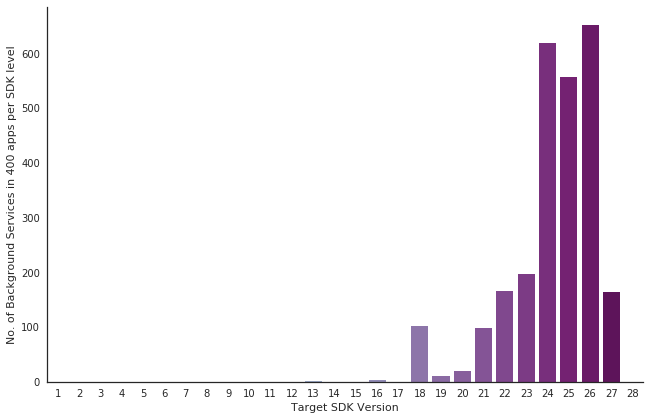

In [134]:
sns.set(style="white")

sdkLevel = np.arange(1,29)

g = sns.factorplot(x="avgBS", data = dfBS, kind = "count", palette="BuPu", size=6, aspect=1.5, order=sdkLevel)
g.set(xlabel='Target SDK Version', ylabel='No. of Background Services in 400 apps per SDK level')
g.set_xticklabels(step=1)
# g.set_yticklabels(step=1)

In [41]:
import matplotlib as mlp
%matplotlib inline
mlp.use('agg')
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packag

In [79]:
target15 = []; target16 = []; target17 = []; target18 = []; target19 = []; target20 = []; 
target21 = []; target22 = []; target23 = []; target24 = [] ; target25 = []; target26 = []; target27 = [];
target28 = [];

targetb15 = []; targetb16 = []; targetb17 = []; targetb18 = []; targetb19 = []; targetb20 = []; 
targetb21 = []; targetb22 = []; targetb23 = []; targetb24 = [] ; targetb25 = []; targetb26 = []; targetb27 = [];
targetb28 = [];

min15 = []; min16 = []; min17 = []; min18 = []; min19 = []; min20 = []; min21 = []; min22 = []; 
min23 = []; min24 = []; min25 = []; min26 = []; min27 = []; min28 = []; 

minb15 = []; minb16 = []; minb17 = []; minb18 = []; minb19 = []; minb20 = []; minb21 = []; minb22 = []; 
minb23 = []; minb24 = []; minb25 = []; minb26 = []; minb27 = []; minb28 = []; 

In [81]:
for i, row in df.iterrows():
    if(row['target_sdk']==(15)):
        target15.append(row['totalFS'])
        targetb15.append(row['totalBS'])
    if(row['min_sdk'] == (15)):
        min15.append(row['totalFS'])
        minb15.append(row['totalBS'])
    if(row['target_sdk']==(16)):
        target16.append(row['totalFS'])
        targetb16.append(row['totalBS'])
    if(row['min_sdk'] == (16)):
        min16.append(row['totalFS'])
        minb16.append(row['totalBS'])
    if(row['target_sdk']==(17)):
        target17.append(row['totalFS'])
        targetb17.append(row['totalBS'])
    if(row['min_sdk'] == (17)):
        min17.append(row['totalFS'])
        minb17.append(row['totalBS'])
    if(row['target_sdk']==(18)):
        target18.append(row['totalFS'])
        targetb18.append(row['totalBS'])
    if(row['min_sdk'] == (18)):
        min18.append(row['totalFS'])
        minb18.append(row['totalBS'])
    if(row['target_sdk']==(19)):
        target19.append(row['totalFS'])
        targetb19.append(row['totalBS'])
    if(row['min_sdk'] == (19)):
        min19.append(row['totalFS'])
        minb19.append(row['totalBS'])
    if(row['target_sdk']==(20)):
        target20.append(row['totalFS'])
        targetb20.append(row['totalBS'])
    if(row['min_sdk'] == (20)):
        min20.append(row['totalFS'])
        minb20.append(row['totalBS'])
    if(row['target_sdk']==(21)):
        target21.append(row['totalFS'])
        targetb21.append(row['totalBS'])
    if(row['min_sdk'] == (21)):
        min21.append(row['totalFS'])
        minb21.append(row['totalBS'])
    if(row['target_sdk']==(22)):
        target22.append(row['totalFS'])
        targetb22.append(row['totalBS'])
    if(row['min_sdk'] == (22)):
        min22.append(row['totalFS'])
        minb22.append(row['totalBS'])
    if(row['target_sdk']==(23)):
        target23.append(row['totalFS'])
        targetb23.append(row['totalBS'])
    if(row['min_sdk'] == (23)):
        min23.append(row['totalFS'])
        minb23.append(row['totalBS'])
    if(row['target_sdk']==(24)):
        target24.append(row['totalFS'])
        targetb24.append(row['totalBS'])
    if(row['min_sdk'] == (24)):
        min24.append(row['totalFS'])
        minb24.append(row['totalBS'])
    if(row['target_sdk']==(25)):
        target25.append(row['totalFS'])
        targetb25.append(row['totalBS'])
    if(row['min_sdk'] == (25)):
        min25.append(row['totalFS'])
        minb25.append(row['totalBS'])
    if(row['target_sdk']==(26)):
        target26.append(row['totalFS'])
        targetb26.append(row['totalBS'])
    if(row['min_sdk'] == (26)):
        min26.append(row['totalFS'])
        minb26.append(row['totalBS'])
    if(row['target_sdk']==(27)):
        target27.append(row['totalFS'])
        targetb27.append(row['totalBS'])
    if(row['min_sdk'] == (27)):
        min27.append(row['totalFS'])
        minb27.append(row['totalBS'])
    if(row['target_sdk']==(28)):
        target28.append(row['totalFS'])
        targetb28.append(row['totalBS'])
    if(row['min_sdk'] == (28)):
        min28.append(row['totalFS'])       
        minb28.append(row['totalBS'])

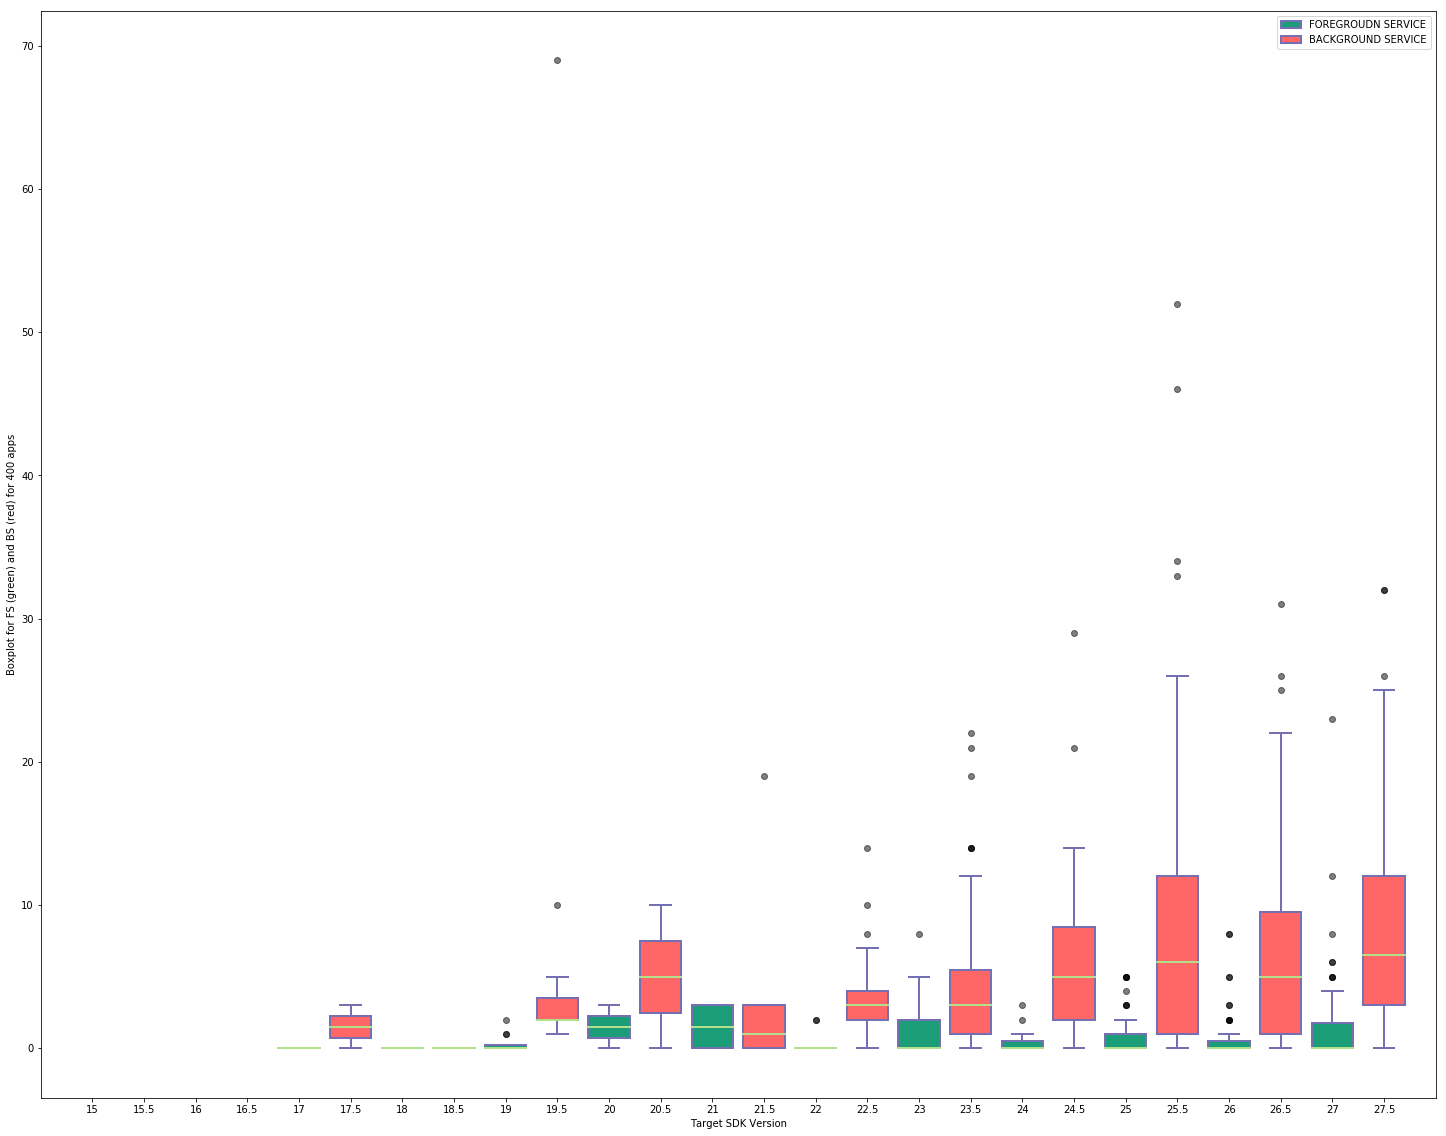

In [161]:
targetFSToPlot = [target15, targetb15, target16, targetb16, target17, targetb17, target18, targetb18, target19, targetb19, 
                  target20, targetb20, target21, targetb21, target22, targetb22, target23, targetb23, target24, targetb24, 
                 target25, targetb25, target26, targetb26, target27, targetb27]

initX = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
x_label = [15,15.5,16 ,16.5, 17,17.5,18, 18.5,19, 19.5, 20 ,20.5, 21, 21.5, 22, 22.5,23,23.5, 24, 24.5,25, 25.5, 26, 26.5, 27, 27.5]

fig = plt.figure(1, figsize=(25,20))
plt.xlabel("Target SDK Version")
plt.ylabel("Boxplot for FS (green) and BS (red) for 400 apps")
ax = fig.add_subplot(111)
bp = ax.boxplot(targetFSToPlot, positions=x_label, patch_artist=True, widths=0.4)

temp = 0
for box in bp['boxes']:
    if(temp%2==1): #background
        box.set( color='#7570b3', linewidth=2)
        box.set( facecolor = '#ff6666' )
    else: #foreground
        box.set( color='#7570b3', linewidth=2)
        box.set( facecolor = '#1b9e77' )
    temp+=1

temp = 0
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.legend( (bp['boxes'][0], bp['boxes'][1]), ('FOREGROUD SERVICE', 'BACKGROUND SERVICE') )

# fig.savefig('fig1.png', bbox_inches='tight')
plt.show()
# plt.savefig('Target_VS_BackandFore.png')

                        Boxplot for TargetSDK vs [ Foreground(Green) and Background(Red) ]

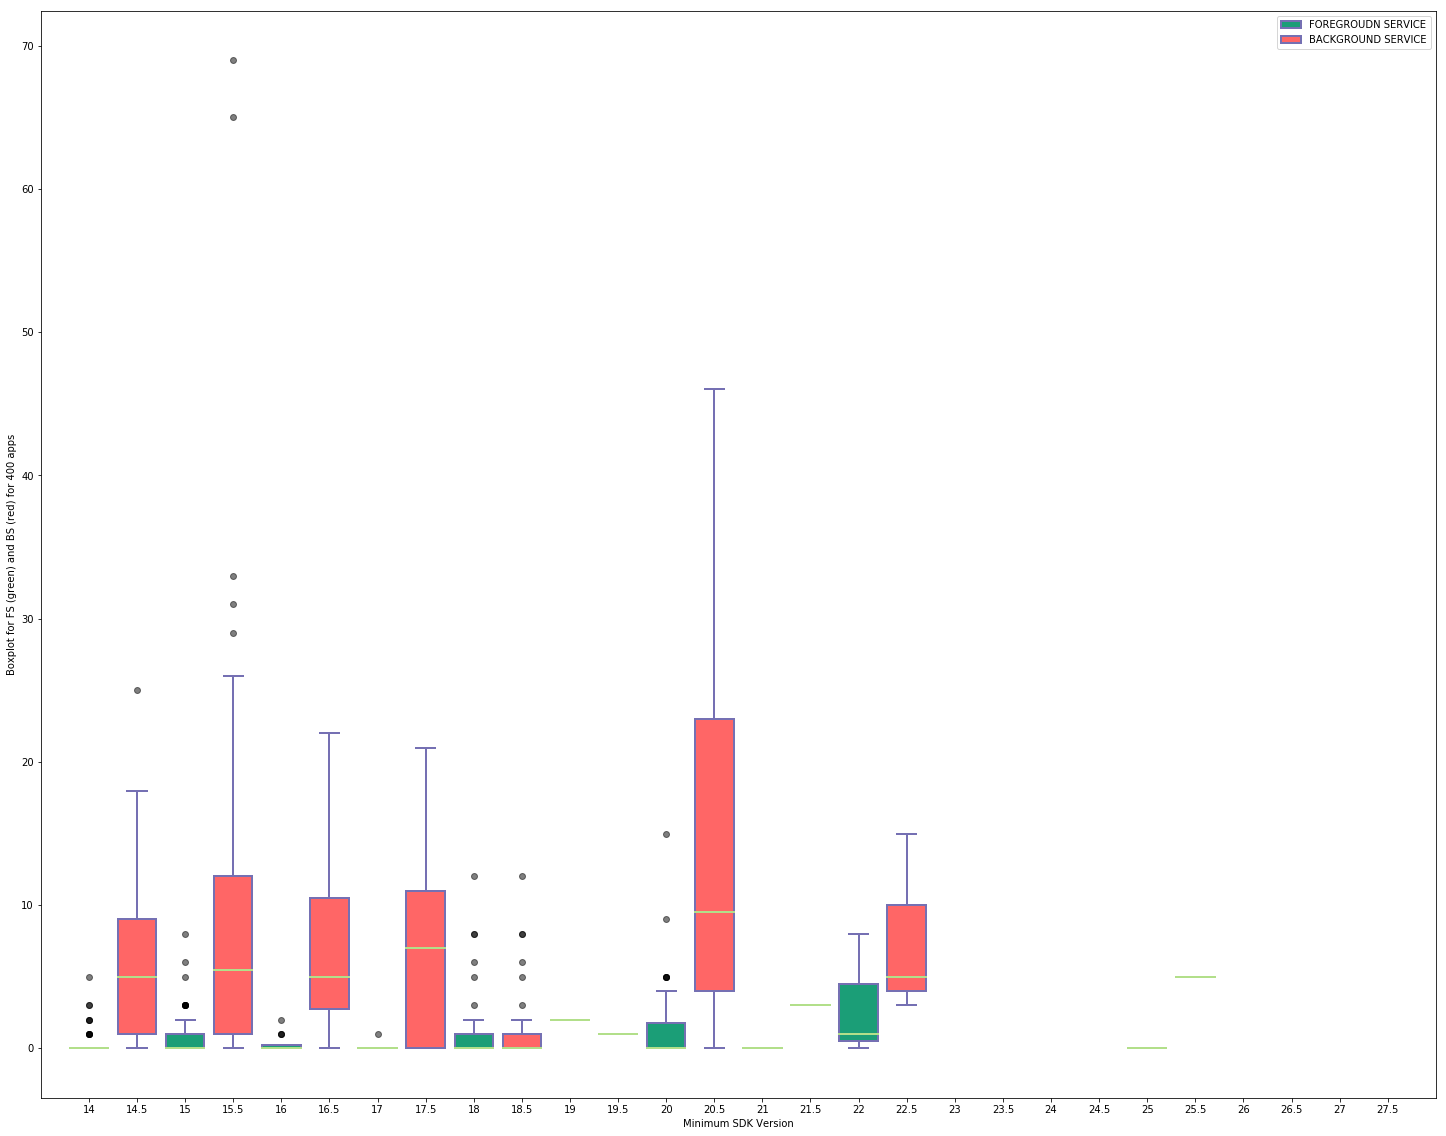

<Figure size 432x288 with 0 Axes>

In [160]:
targetFSToPlot = [min15, minb15, min16, minb16, min17, minb17, min18, minb18, min19, min19, 
                  min20, minb20, min21, minb21, min22, minb22, min23, minb23, min24, minb24, 
                 min25, minb25, min26, minb26, min27, minb27, min28, minb28]

initX = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
x_label = [14, 14.5, 15,15.5,16 ,16.5, 17,17.5,18, 18.5,19, 19.5, 20 ,20.5, 21, 21.5, 22, 22.5,23,23.5, 24, 24.5,25, 25.5, 26, 26.5, 27, 27.5]

fig = plt.figure(1, figsize=(25,20))
plt.xlabel("Minimum SDK Version")
plt.ylabel("Boxplot for FS (green) and BS (red) for 400 apps")
ax = fig.add_subplot(111)
bp = ax.boxplot(targetFSToPlot, positions=x_label, patch_artist=True, widths=0.4)

temp = 0
for box in bp['boxes']:
    if(temp%2==1): #background
        box.set( color='#7570b3', linewidth=2)
        box.set( facecolor = '#ff6666' )
    else: #foreground
        box.set( color='#7570b3', linewidth=2)
        box.set( facecolor = '#1b9e77' )
    temp+=1

temp = 0
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.legend( (bp['boxes'][0], bp['boxes'][1]), ('FOREGROUDN SERVICE', 'BACKGROUND SERVICE') )

# fig.savefig('fig1.png', bbox_inches='tight')
plt.show()
# plt.savefig('MinVSBackandFore.png')

                            Boxplot for MiniumumSDK vs [ Foreground(Green) and Background(Red) ]

In [130]:
countTargetAPK = []
countMinAPK = []

for i in range(1, 30):
    countTargetAPK.append(0)
    countMinAPK.append(0)
    
for i, row in df.iterrows():
    countTargetAPK[row['target_sdk']] =  countTargetAPK[row['target_sdk']] + 1
    countMinAPK[row['min_sdk']] = countMinAPK[row['min_sdk']] + 1

    
x = np.arange(27)
# x = []
# for i in range(1,28):
#     x.append(i)

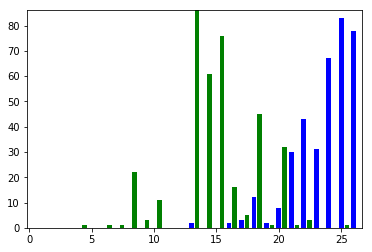

In [157]:
ax = plt.subplot(111)
ax.bar(x, countTargetAPK[1:28],width=0.37,color='b',align='center')
ax.bar(x+0.45, countMinAPK[1:28],width=0.37,color='g',align='center')
ax.autoscale(tight=True)


plt.show()

In [ ]:
count=0
for i, rows in df.iterows():
    if(row['min_sdk']==23):
        count+=1 
print(count)